<a href="https://colab.research.google.com/github/sril1485/CE888/blob/master/Ass_2_Final_malware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [0]:
import json
token = {"username":"srinidhikarthick","key":"15467a092669b85df36db57586c2dee5"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory


In [0]:
!kaggle config set -n path -v{/content}

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [2]:
import os

os.environ['KAGGLE_USERNAME'] = "srinidhikarthick" # username from the json file

os.environ['KAGGLE_KEY'] = "15467a092669b85df36db57586c2dee5" # key from the json file

!kaggle competitions download -c microsoft-malware-prediction -p /content

 98% 657M/672M [00:10<00:00, 35.2MB/s]
100% 672M/672M [00:10<00:00, 69.0MB/s]
 98% 755M/768M [00:10<00:00, 78.1MB/s]
100% 768M/768M [00:10<00:00, 74.8MB/s]
 92% 123M/134M [00:02<00:00, 52.4MB/s]
100% 134M/134M [00:02<00:00, 66.4MB/s]


In [3]:
!unzip \*.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  test.csv.zip
  inflating: test.csv                

Archive:  train.csv.zip
  inflating: train.csv               

3 archives were successfully processed.


In [4]:
import pandas as pd
train = pd.read_csv("train.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train.shape

(8921483, 83)

In [0]:
import numpy as np
## missing values for train data
for i in train.columns:
    if train[i].dtype == 'object':
      train[i] = train[i].fillna(train[i].mode().iloc[0])
    if (train[i].dtype == 'int' or train[i].dtype == 'float'):
      train[i] = train[i].fillna(np.mean(train[i]))

In [0]:
# replacing the categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
for i in train.columns:
    if (train[i].dtype == 'object'):
      train[i] = lenc.fit_transform(train[i].astype('str'))
      train[i] = train[i].astype('object')


In [8]:
test = pd.read_csv("test.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#missing values for testing data
for i in test.columns:
    if test[i].dtype == 'object':
      test[i] = test[i].fillna(train[i].mode().iloc[0])
    if (test[i].dtype == 'int' or test[i].dtype == 'float'):
      test[i] = train[i].fillna(np.mean(train[i]))

In [0]:
# replacing the categorical values into numerical values
for i in test.columns:
    if (test[i].dtype == 'object'):
      test[i] = lenc.fit_transform(test[i].astype('str'))
      test[i] = test[i].astype('object')

In [0]:
#adding a new column called source to identify them as whether they belong to training or testing dataset
train['source'] = 0
test['source'] = 1

In [0]:
## taking sample from training and test data
training = train.sample(1200, random_state=11,replace=True)
testing = test.sample(500, random_state=11,replace=True)

In [0]:
target = training['HasDetections']
del training['HasDetections']

In [0]:
## combining random samples
combined = training.append(testing)
y = combined['source']
combined.drop('source',axis=1,inplace=True)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
## modelling
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []

for i in combined.columns:
    score = cross_val_score(model,pd.DataFrame(combined[i]),y,cv=2,scoring='roc_auc')
    if (np.mean(score) > 0.8):
        drop_list.append(i)
        print(i,np.mean(score))

EngineVersion 0.8603916666666667
AppVersion 0.9851533333333333
AvSigVersion 0.9273316666666667
OsBuildLab 0.969355
PuaMode 1.0
SmartScreen 0.9849266666666667
Census_ProcessorClass 1.0
Census_PrimaryDiskTypeName 0.8647366666666667
Census_ChassisTypeName 0.9828666666666668
Census_PowerPlatformRoleName 0.99834
Census_InternalBatteryType 0.9991433333333333
Census_OSVersion 0.8465750000000001
Census_OSBranch 0.8962366666666667
Census_OSEdition 0.9571833333333333
Census_GenuineStateName 0.9367049999999999
Census_FlightRing 0.9835816666666666


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


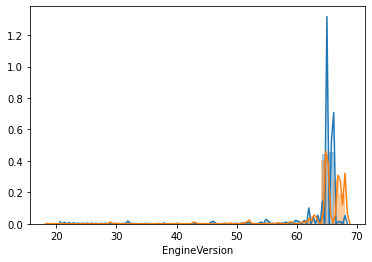

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(training['EngineVersion'])
sns.distplot(testing['EngineVersion'])
#plt.show()

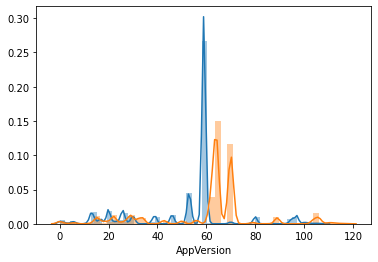

In [0]:
import seaborn as sns
sns.distplot(training['AppVersion'])
sns.distplot(testing['AppVersion'])

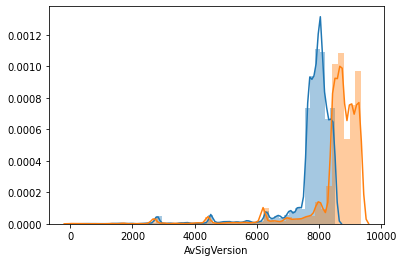

In [0]:
import seaborn as sns
sns.distplot(training['AvSigVersion'])
sns.distplot(testing['AvSigVersion'])


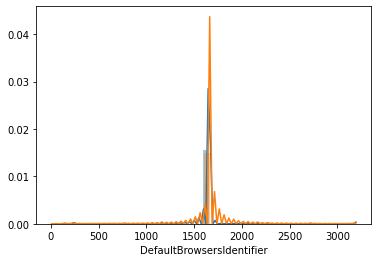

In [0]:
import seaborn as sns
sns.distplot(training['DefaultBrowsersIdentifier'])
sns.distplot(testing['DefaultBrowsersIdentifier'])


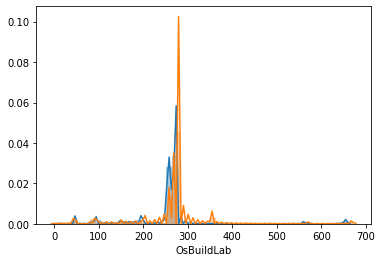

In [0]:
import seaborn as sns
sns.distplot(training['OsBuildLab'])
sns.distplot(testing['OsBuildLab'])


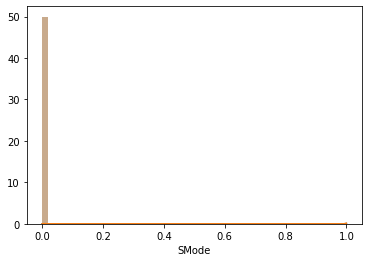

In [0]:
import seaborn as sns
sns.distplot(training['SMode'])
sns.distplot(testing['SMode'])


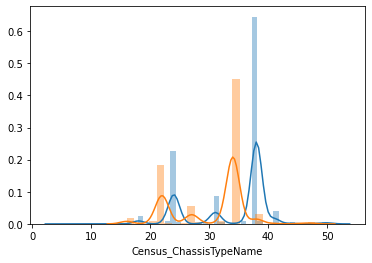

In [0]:
import seaborn as sns
sns.distplot(training['Census_ChassisTypeName'])
sns.distplot(testing['Census_ChassisTypeName'])


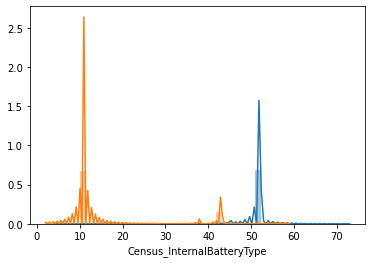

In [0]:
import seaborn as sns
sns.distplot(training['Census_InternalBatteryType'])
sns.distplot(testing['Census_InternalBatteryType'])


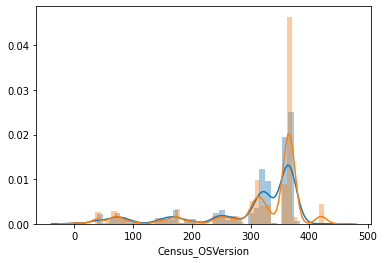

In [0]:
import seaborn as sns
sns.distplot(training['Census_OSVersion'])
sns.distplot(testing['Census_OSVersion'])


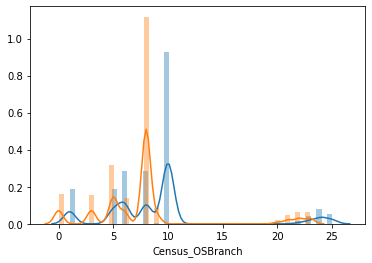

In [0]:
import seaborn as sns
sns.distplot(training['Census_OSBranch'])
sns.distplot(testing['Census_OSBranch'])


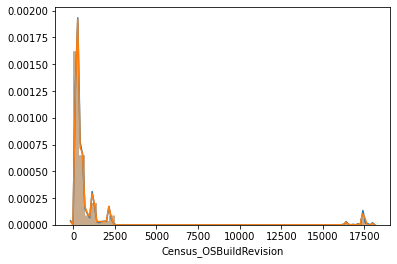

In [0]:
import seaborn as sns
sns.distplot(training['Census_OSBuildRevision'])
sns.distplot(testing['Census_OSBuildRevision'])


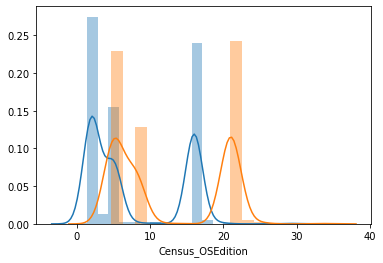

In [0]:
import seaborn as sns
sns.distplot(training['Census_OSEdition'])
sns.distplot(testing['Census_OSEdition'])


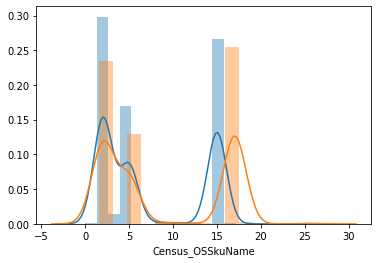

In [0]:
import seaborn as sns
sns.distplot(training['Census_OSSkuName'])
sns.distplot(testing['Census_OSSkuName'])


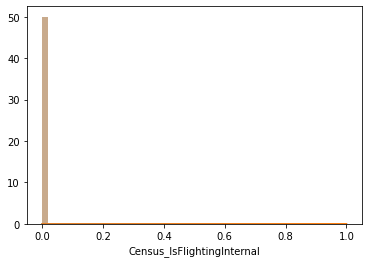

In [0]:
import seaborn as sns
sns.distplot(training['Census_IsFlightingInternal'])
sns.distplot(testing['Census_IsFlightingInternal'])


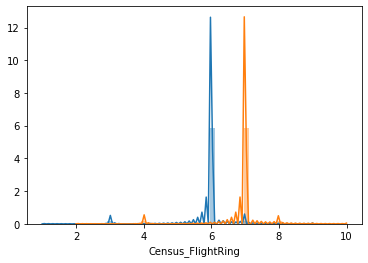

In [0]:
import seaborn as sns
sns.distplot(training['Census_FlightRing'])
sns.distplot(testing['Census_FlightRing'])


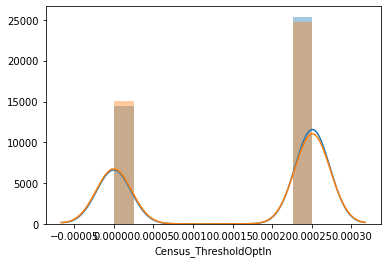

In [0]:
import seaborn as sns
sns.distplot(training['Census_ThresholdOptIn'])
sns.distplot(testing['Census_ThresholdOptIn'])


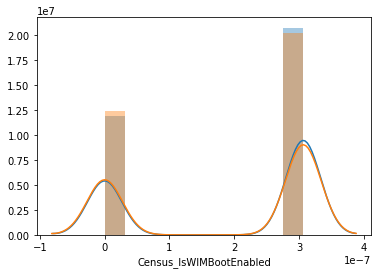

In [0]:
import seaborn as sns
sns.distplot(training['Census_IsWIMBootEnabled'])
sns.distplot(testing['Census_IsWIMBootEnabled'])


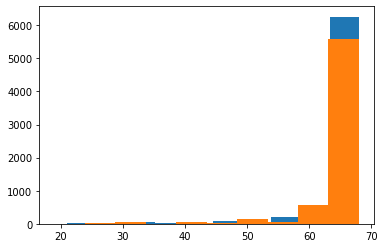

In [0]:
plt.hist(training['EngineVersion'])
plt.hist(testing['EngineVersion'])
plt.show()

(array([ 101.,  443.,  523.,   89.,  163., 4677.,   37.,  151.,  253.,
          63.]),
 array([0.0, 11.8, 23.6, 35.400000000000006, 47.2, 59.0, 70.80000000000001,
        82.60000000000001, 94.4, 106.2, 118.0], dtype=object),
 <a list of 10 Patch objects>)

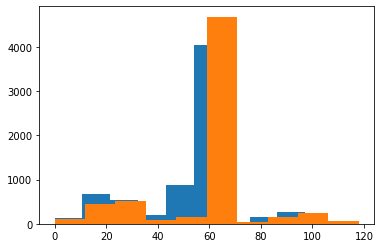

In [0]:
import seaborn as sns
plt.hist(training['AppVersion'])
plt.hist(testing['AppVersion'])


(array([5.000e+00, 8.000e+00, 5.000e+01, 1.500e+01, 7.600e+01, 3.700e+01,
        1.760e+02, 1.590e+02, 6.900e+02, 5.284e+03]),
 array([41.0, 972.5, 1904.0, 2835.5, 3767.0, 4698.5, 5630.0, 6561.5,
        7493.0, 8424.5, 9356.0], dtype=object),
 <a list of 10 Patch objects>)

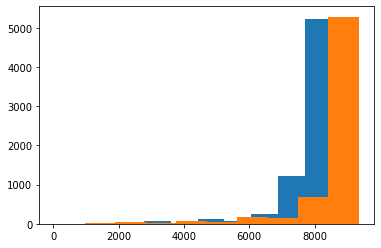

In [0]:
import seaborn as sns
plt.hist(training['AvSigVersion'])
plt.hist(testing['AvSigVersion'])


(array([  76.,    8.,   19.,   27.,   11., 6246.,   30.,   27.,   13.,
          43.]),
 array([   8. ,  326.7,  645.4,  964.1, 1282.8, 1601.5, 1920.2, 2238.9,
        2557.6, 2876.3, 3195. ]),
 <a list of 10 Patch objects>)

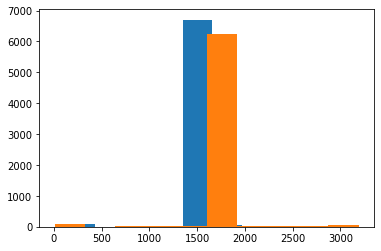

In [0]:
import seaborn as sns
plt.hist(training['DefaultBrowsersIdentifier'])
plt.hist(testing['DefaultBrowsersIdentifier'])


(array([1.850e+02, 3.050e+02, 3.040e+02, 1.339e+03, 3.975e+03, 2.560e+02,
        2.000e+00, 3.000e+00, 4.600e+01, 8.500e+01]),
 array([0.0, 67.2, 134.4, 201.60000000000002, 268.8, 336.0,
        403.20000000000005, 470.40000000000003, 537.6, 604.8000000000001,
        672.0], dtype=object),
 <a list of 10 Patch objects>)

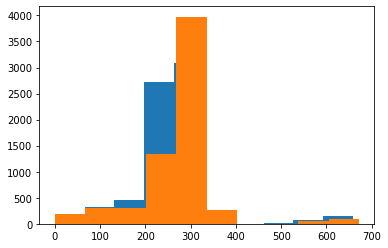

In [0]:
import seaborn as sns
plt.hist(training['OsBuildLab'])
plt.hist(testing['OsBuildLab'])


(array([6.496e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

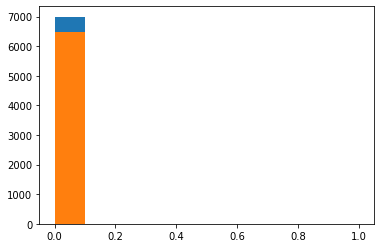

In [0]:
import seaborn as sns
plt.hist(training['SMode'])
plt.hist(testing['SMode'])


(array([ 143., 1599.,   35.,  540.,   14., 3820.,  261.,   27.,    0.,
          61.]),
 array([16.0, 19.2, 22.4, 25.6, 28.8, 32.0, 35.2, 38.400000000000006, 41.6,
        44.8, 48.0], dtype=object),
 <a list of 10 Patch objects>)

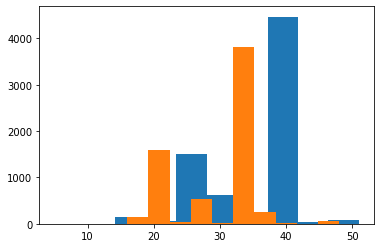

In [0]:
import seaborn as sns
plt.hist(training['Census_ChassisTypeName'])
plt.hist(testing['Census_ChassisTypeName'])


(array([1.650e+02, 4.967e+03, 0.000e+00, 3.000e+00, 0.000e+00, 4.000e+00,
        1.760e+02, 1.175e+03, 4.000e+00, 6.000e+00]),
 array([2.0, 7.7, 13.4, 19.1, 24.8, 30.5, 36.2, 41.9, 47.6,
        53.300000000000004, 59.0], dtype=object),
 <a list of 10 Patch objects>)

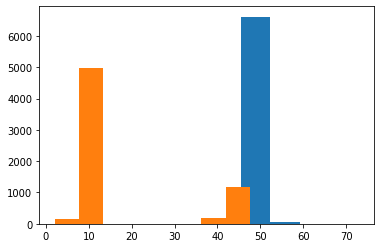

In [0]:
import seaborn as sns
plt.hist(training['Census_InternalBatteryType'])
plt.hist(testing['Census_InternalBatteryType'])


(array([ 192.,  335.,   49.,  371.,  106.,  346.,  996., 1024., 2817.,
         264.]), array([0.0, 45.2, 90.4, 135.60000000000002, 180.8, 226.0,
        271.20000000000005, 316.40000000000003, 361.6, 406.8, 452.0],
       dtype=object), <a list of 10 Patch objects>)

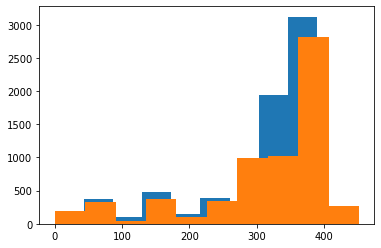

In [0]:
import seaborn as sns
plt.hist(training['Census_OSVersion'])
plt.hist(testing['Census_OSVersion'])


(array([ 477.,  472., 1366., 3602.,    0.,    0.,    7.,    0.,   56.,
         520.]),
 array([0.0, 2.3, 4.6, 6.8999999999999995, 9.2, 11.5, 13.799999999999999,
        16.099999999999998, 18.4, 20.7, 23.0], dtype=object),
 <a list of 10 Patch objects>)

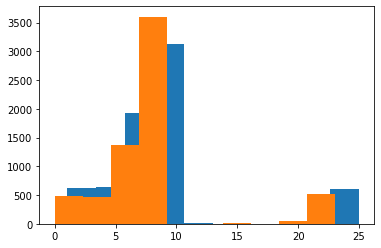

In [0]:
import seaborn as sns
plt.hist(training['Census_OSBranch'])
plt.hist(testing['Census_OSBranch'])


(array([6011.,  292.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         197.]),
 array([    0. ,  1794.6,  3589.2,  5383.8,  7178.4,  8973. , 10767.6,
        12562.2, 14356.8, 16151.4, 17946. ]),
 <a list of 10 Patch objects>)

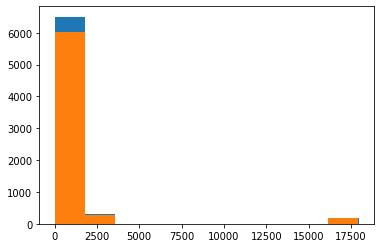

In [0]:
import seaborn as sns
plt.hist(training['Census_OSBuildRevision'])
plt.hist(testing['Census_OSBuildRevision'])


(array([2430., 1372.,   18.,   11.,    0., 2578.,   48.,   31.,    0.,
          12.]), array([3.0, 6.1, 9.2, 12.3, 15.4, 18.5, 21.6, 24.7, 27.8,
        30.900000000000002, 34.0], dtype=object), <a list of 10 Patch objects>)

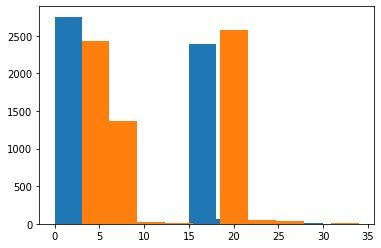

In [0]:
import seaborn as sns
plt.hist(training['Census_OSEdition'])
plt.hist(testing['Census_OSEdition'])


(array([2.285e+03, 1.488e+03, 3.000e+01, 1.800e+01, 1.000e+01, 1.000e+00,
        2.656e+03, 0.000e+00, 0.000e+00, 1.200e+01]),
 array([0.0, 2.7, 5.4, 8.100000000000001, 10.8, 13.5, 16.200000000000003,
        18.900000000000002, 21.6, 24.3, 27.0], dtype=object),
 <a list of 10 Patch objects>)

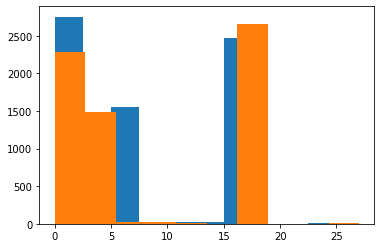

In [0]:
import seaborn as sns
plt.hist(training['Census_OSSkuName'])
plt.hist(testing['Census_OSSkuName'])


(array([6.499e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

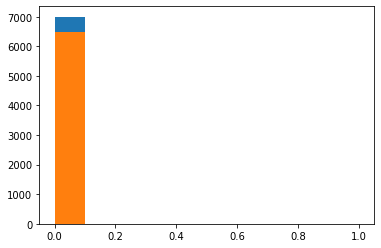

In [0]:
import seaborn as sns
plt.hist(training['Census_IsFlightingInternal'])
plt.hist(testing['Census_IsFlightingInternal'])


(array([4.000e+00, 0.000e+00, 2.080e+02, 0.000e+00, 0.000e+00, 1.300e+01,
        6.099e+03, 1.610e+02, 7.000e+00, 8.000e+00]),
 array([2.0, 2.8, 3.6, 4.4, 5.2, 6.0, 6.800000000000001,
        7.6000000000000005, 8.4, 9.2, 10.0], dtype=object),
 <a list of 10 Patch objects>)

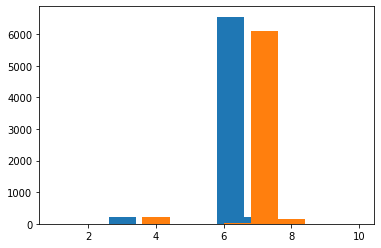

In [0]:
import seaborn as sns
plt.hist(training['Census_FlightRing'])
plt.hist(testing['Census_FlightRing'])


(array([2464.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4036.]),
 array([0.00000000e+00, 2.50756110e-05, 5.01512219e-05, 7.52268329e-05,
        1.00302444e-04, 1.25378055e-04, 1.50453666e-04, 1.75529277e-04,
        2.00604888e-04, 2.25680499e-04, 2.50756110e-04]),
 <a list of 10 Patch objects>)

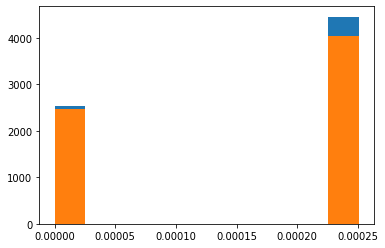

In [0]:
import seaborn as sns
plt.hist(training['Census_ThresholdOptIn'])
plt.hist(testing['Census_ThresholdOptIn'])


(array([2467.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4033.]),
 array([0.00000000e+00, 3.06581069e-08, 6.13162138e-08, 9.19743208e-08,
        1.22632428e-07, 1.53290535e-07, 1.83948642e-07, 2.14606748e-07,
        2.45264855e-07, 2.75922962e-07, 3.06581069e-07]),
 <a list of 10 Patch objects>)

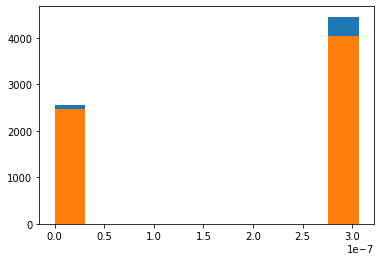

In [0]:
import seaborn as sns
plt.hist(training['Census_IsWIMBootEnabled'])
plt.hist(testing['Census_IsWIMBootEnabled'])


51.03
50.642545454545456
50.836666666666666
50.77587096774194
50.78775609756098
50.87098039215686
50.82265573770492
50.767380281690144
50.76664197530864
50.76993406593406
50.77251485148515
50.799891891891896
50.809933884297514
50.82830534351145
50.83485106382978
50.86838410596026
50.795739130434775
50.78254970760234
50.84243093922652
50.78178010471204
50.796716417910446
50.84474881516587
50.83070588235294
50.79537662337663
50.76983402489626
50.8146374501992
50.829295019157094
50.803195571955726
50.79148754448398
50.84768384879725
50.82203986710964
50.80077813504823
50.77803115264797
50.80680966767371
50.826815249266865
50.7945811965812
50.7904432132964
50.79916981132076
50.79349606299213
50.78390792838875
50.78872817955112
50.78268613138686
50.824517814726846
50.80432482598608
50.78985034013606
50.78324611973393
50.79630802603037
50.802433121019114
50.80272765072765
50.805816700611
50.81916167664671
50.795522504892375
50.80583877159309
50.81432391713748
50.81606284658041
50.81359346642

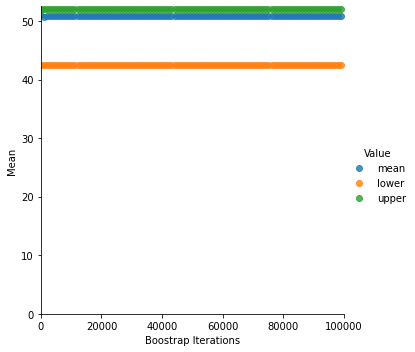

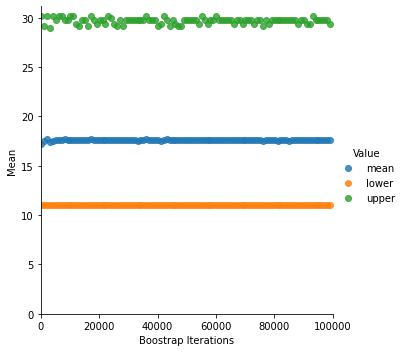

In [0]:
def boostrap_mean(sample,n_iterations):
  import random 
  
  data_mean11=np.array([])
  for i in range(n_iterations):
    sample1=np.random.choice(sample,size=5)
    data_mean1=np.mean(sample1)
    data_mean11=np.append(data_mean11,data_mean1)
  data_mean=np.mean(data_mean11)  
  print (data_mean)
  lower=np.percentile(data_mean11,5)
  upper=np.percentile(data_mean11,95)
  return data_mean,lower,upper
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(train['Census_InternalBatteryType'], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(test['Census_InternalBatteryType'], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)


def boostrap_mean1(sample,n_iterations):
  import random 
  
  data_mean11=np.array([])
  for i in range(n_iterations):
    sample1=np.random.choice(sample,size=5)
    data_mean1=np.mean(sample1)
    data_mean11=np.append(data_mean11,data_mean1)
 
  
  lower=np.percentile(data_mean11,5)
  upper=np.percentile(data_mean11,95)
  data_mean1=data_mean11[(data_mean11>lower) & (data_mean11<upper)]  
  data_mean=np.mean(data_mean1) 
  
 
  return data_mean
mean1=boostrap_mean1(train['Census_InternalBatteryType'], 10000 )
mean2=boostrap_mean1(test['Census_InternalBatteryType'],10000 )

T_obs=mean1-mean2


data1=train['Census_InternalBatteryType']
data2=test['Census_InternalBatteryType']
new_data=np.concatenate([data1,data2])
count=0
for i in range(20000):
  dat1=np.random.choice(new_data,7000)
  dat2=np.random.choice(new_data,6000)
  mean_dat1=np.mean(dat1)
  mean_dat2=np.mean(dat2)
  T_perm= mean_dat2-mean_dat1
  if T_perm>T_obs:
    count=count+1
p_value=count/20000
print(p_value)

In [0]:
# using a basic model with all the features
training = train.drop('source',axis=1)
testing = test.drop('source',axis=1)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [0]:
rf = RandomForestRegressor(n_estimators=200, max_depth=6,max_features=10)
rf.fit(training.drop('HasDetections',axis=1),training['HasDetections'])
pred = rf.predict(testing)
columns = ['HasDetections']
sub = pd.DataFrame(data=pred,columns=columns)
sub['id'] = test['id']
sub = sub[['id','HasDetections']]
sub.to_csv('with_drifting.csv', index=False)

In [0]:
X = target
y = training

In [0]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [0]:
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [0]:
rfc_predict.to_csv("submission_with_features.csv", index=False)

In [0]:
feat=["EngineVersion","AppVersion","AvSigVersion","OsBuildLab","PuaMode","SmartScreen","Census_ProcessorClass","Census_PrimaryDiskTypeName","Census_ChassisTypeName",'Census_PowerPlatformRoleName',"Census_InternalBatteryType","Census_OSVersion","Census_OSBranch","Census_OSEdition","Census_OSSkuName","Census_GenuineStateName","Census_FlightRing"]

In [0]:
training.drop(["EngineVersion","AppVersion","AvSigVersion","OsBuildLab","PuaMode","SmartScreen","Census_ProcessorClass","Census_PrimaryDiskTypeName","Census_ChassisTypeName",'Census_PowerPlatformRoleName',"Census_InternalBatteryType","Census_OSVersion","Census_OSBranch","Census_OSEdition","Census_OSSkuName","Census_GenuineStateName","Census_FlightRing"], axis=1, inplace=True)

In [0]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [0]:
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [0]:
rfc_predict.to_csv("submission_without_features.csv", index=False)

In [0]:
!kaggle competitions submit -c sberbank-russian-housing-market -f /content/submission_no_weight.csv -m "sub1"

In [0]:
!kaggle competitions submit -c sberbank-russian-housing-market -f /content/submission_no_weight.csv -m "sub2"